In [48]:
import matplotlib.pyplot as plt

In [708]:
import pandas as pd
from sklearn.model_selection import train_test_split
data_test=pd.read_excel("Developed Trained Data.xlsx")
data_test.head()

,application_date,segment,Day,Month,Day.1,Month Value,Special Day,Sum of case_count
0,2017-04-01,1,Sat,April,1,Start,Regular,299
1,2017-04-03,1,Mon,April,3,Normal,Regular,42
2,2017-04-04,1,Tue,April,4,Normal,Regular,23
3,2017-04-05,1,Wed,April,5,Normal,Regular,1530
4,2017-04-07,1,Fri,April,7,Normal,Regular,1341


In [709]:
def year(x):
    return x.year
data_test['year']=data_test['application_date'].apply(lambda x:year(x))

In [710]:
segment_data=data_test[data_test['segment']==1]

In [711]:
segment_data.head()

,application_date,segment,Day,Month,Day.1,Month Value,Special Day,Sum of case_count,year
0,2017-04-01,1,Sat,April,1,Start,Regular,299,2017
1,2017-04-03,1,Mon,April,3,Normal,Regular,42,2017
2,2017-04-04,1,Tue,April,4,Normal,Regular,23,2017
3,2017-04-05,1,Wed,April,5,Normal,Regular,1530,2017
4,2017-04-07,1,Fri,April,7,Normal,Regular,1341,2017


In [712]:
data=pd.get_dummies(segment_data.drop(['application_date','segment','Month Value','year'],axis=1))
data.head()

,Day.1,Sum of case_count,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_April,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Special Day_Dasara,Special Day_Deepavali,Special Day_Fin. Year End,Special Day_Regular
0,1,299,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,42,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,4,23,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5,1530,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,7,1341,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [713]:
data.shape

(806, 25)

In [714]:
xTrain=xVars.iloc[:700,:]

In [715]:
xTrain.shape

(700, 24)

In [716]:
xVars=data.drop('Sum of case_count',axis=1)
yVars=data[['Sum of case_count']]
#xTrain,xValid, yTrain,yValid=train_test_split(xVars,yVar,train_size=0.8)
xTrain=xVars.iloc[:700,:]
xValid=xVars.iloc[700:,:]
yTrain=yVars.iloc[:700,:]
yValid=yVars.iloc[700:,:]

In [717]:
xTrain.shape

(700, 24)

In [718]:
yTrain.shape

(700, 1)

In [719]:
xValid.shape

(106, 24)

In [720]:
yValid.shape

(106, 1)

In [721]:
from sklearn.preprocessing import MinMaxScaler

In [722]:
scaler=MinMaxScaler()


scaler.fit(xTrain)

xTrain=scaler.transform(xTrain)
xValid=scaler.transform(xValid)

In [725]:
pd.DataFrame(xTrain).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000
mean,0.495429,0.142857,0.144286,0.141429,0.137143,0.145714,0.144286,0.144286,0.077143,0.087143,...,0.085714,0.071429,0.087143,0.085714,0.088571,0.080000,0.005714,0.002857,0.001429,0.99000
std,0.289966,0.350177,0.351630,0.348712,0.344244,0.353072,0.351630,0.351630,0.267009,0.282246,...,0.280142,0.257724,0.282246,0.280142,0.284327,0.271487,0.075431,0.053414,0.037796,0.09957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,0.733333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [726]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np

In [727]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [729]:
q85=np.quantile(list(nn.predict(xValid)),0.85)
q50=np.quantile(list(nn.predict(xValid)),0.50)


In [730]:
mean_pred=[]
for i in  list(nn.predict(xValid)):
    if i>0:
        pred.append(i)
mean=np.mean(pred)
pred=[]
for i in list(nn.predict(xValid)):
    if i > 0:
        if i>q85:
            pred.append(q85)
        elif i<q50:
            pred.append(i+100)
        else:
            pred.append(i)
    else:
        pred.append(mean)

In [731]:
len(list(nn.predict(xValid)))

106

In [732]:
len(pred)

106

In [733]:
xValid.shape

(106, 24)

In [734]:
print('mea: ',metrics.mean_absolute_error(yTrain,nn.predict(xTrain)))
print('rmse: ',np.sqrt(metrics.mean_squared_error(yTrain,nn.predict(xTrain))))
print('r2q: ',metrics.r2_score(yTrain,nn.predict(xTrain)))
print("----------------------------------------------------------")
print('mea: ',metrics.mean_absolute_error(yValid,nn.predict(xValid)))
print('rmse: ',np.sqrt(metrics.mean_squared_error(yValid,nn.predict(xValid)*1.4)))
print('r2q: ',metrics.r2_score(yValid,nn.predict(xValid)))

mea:  827.0565853427878
rmse:  1158.9817424847931
r2q:  0.711580681053037
----------------------------------------------------------
mea:  1111.4558927048452
rmse:  1270.6956504280136
r2q:  -1.550988846461265


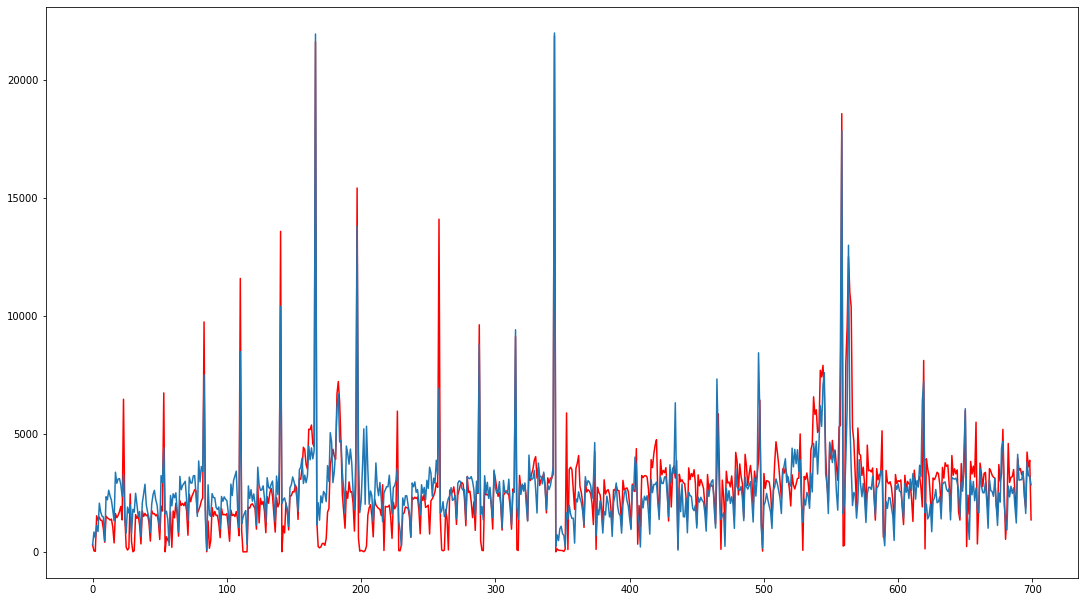

In [735]:
plt.plot(yTrain,c='red')
plt.plot(nn.predict(xTrain))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

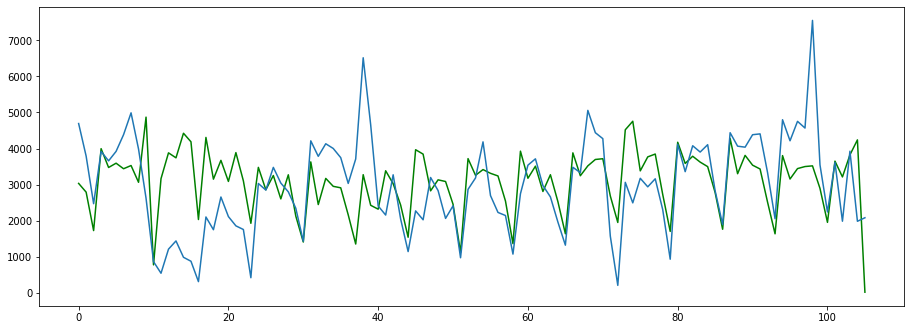

In [736]:
plt.plot(np.array(yValid['Sum of case_count']),c='green')
#plt.plot(np.array(pred))
plt.plot(nn.predict(xValid)*1.4)
fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)
fig.savefig('test2png.png', dpi=100)

In [686]:
test_data=pd.read_excel("Developed Test Data.xlsx")

In [687]:
test_data=test_data[test_data['segment']==1]
test_data.head()

,id,application_date,segment,Day,Month,Day.1,Type of month,Month Value,Special Day
0,1,2019-07-06,1,Sun,July,6,31,Normal,Regular
1,2,2019-07-07,1,Mon,July,7,31,Normal,Regular
2,3,2019-07-08,1,Tue,July,8,31,Normal,Regular
3,4,2019-07-09,1,Wed,July,9,31,Normal,Regular
4,5,2019-07-10,1,Thu,July,10,31,Lower Mid,Regular


In [688]:
test_data=pd.get_dummies(test_data.drop(['id','application_date','segment','Type of month','Month Value'],axis=1))
test_data.shape

(87, 12)

In [689]:
data.shape

(806, 25)

In [690]:
b2=pd.read_csv('b2.csv')

In [691]:
(data.drop('Sum of case_count',axis=1)).columns==b2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [692]:
b21=scaler.transform(b2)

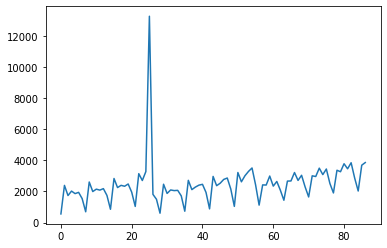

In [705]:
plt.plot(nn.predict(b21))

In [706]:
pd.DataFrame(nn.predict(b21)).to_csv('fulltrained_segment1.csv')

In [702]:
q75=np.quantile(list(nn.predict(xValid)),0.95)
q50=np.quantile(list(nn.predict(xValid)),0.50)


In [703]:
mean_pred=[]
for i in  list(nn.predict(b21)):
    if i>0:
        pred.append(i)
mean=np.mean(pred)
pred=[]
for i in list(nn.predict(b21)):
    if i > 0:
        if i>q85:
            pred.append(q75)
        else:
            pred.append(i)
    else:
        pred.append(mean)

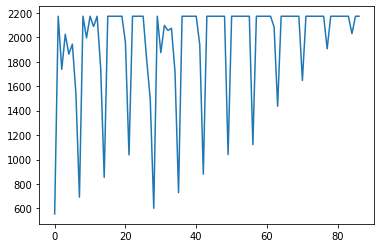

In [704]:
plt.plot(pred)